In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib import gridspec

rc('text', usetex=False)
rc('font', family='serif', size=18)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

In [65]:
threads = pd.read_csv("thread_SYCL.csv")["threads"] #export DPCPP_CPU_NUM_CUS=1,2,4,...

time_tbb = pd.read_csv("thread_TBB.csv")["mean"]
err_tbb = pd.read_csv("thread_TBB.csv")["std"]

time_SYCL = pd.read_csv("thread_SYCL.csv")["mean"]
err_SYCL = pd.read_csv("thread_SYCL.csv")["std"]

time_SYCL_static = pd.read_csv("thread_SYCL_static.csv")["mean"] #export DPCPP_CPU_SCHEDULE=static
err_SYCL_static = pd.read_csv("thread_SYCL_static.csv")["std"]

time_SYCL_affinity = pd.read_csv("thread_SYCL_affinity.csv")["mean"] #export DPCPP_CPU_SCHEDULE=affinity
err_SYCL_affinity = pd.read_csv("thread_SYCL_affinity.csv")["std"]

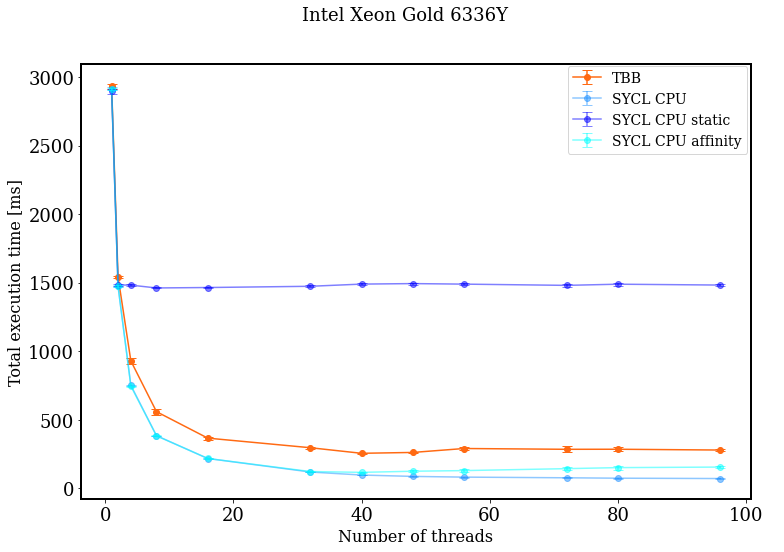

In [66]:
fig,ax = plt.subplots()
ax.errorbar(threads, time_tbb, err_tbb, label="TBB", 
            fmt = 'o-', color='#FF6A13', mfc='#FF6A13', mec="#FF6A13", ecolor='#FF6A13', capsize=5) 
ax.set_xlabel("Number of threads", fontsize = 16)
ax.set_ylabel("Total execution time [ms]", fontsize=16)

ax2 = ax.twiny()
ax2.axes.xaxis.set_visible(False)
ax2.errorbar(threads, time_SYCL, err_SYCL, label="SYCL CPU",
            fmt = 'o-', color='dodgerblue', mfc='dodgerblue', mec="dodgerblue", ecolor='dodgerblue', alpha=0.5, capsize=5)


ax3 = ax.twiny()
ax3.axes.xaxis.set_visible(False)
ax3.errorbar(threads, time_SYCL_static, err_SYCL_static, label="SYCL CPU static",
            fmt = 'o-', color='blue', mfc='blue', mec="blue", ecolor='blue', alpha=0.5, capsize=5)

ax4 = ax.twiny()
ax4.axes.xaxis.set_visible(False)
ax4.errorbar(threads, time_SYCL_affinity, err_SYCL_affinity, label="SYCL CPU affinity",
            fmt = 'o-', color='cyan', mfc='cyan', mec="cyan", ecolor='cyan', alpha=0.5, capsize=5)



fig.suptitle("Intel Xeon Gold 6336Y", fontsize=18)
fig.legend(loc=(0.723,0.72), fontsize=14)
plt.show()